In [1]:
import sqlite3 as sql
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

db_path = "C:/sql/databases/database.sqlite"
con = sql.connect(db_path)

cur = con.cursor()


query = """
SELECT *
FROM sqlite_master
WHERE type='table';
"""

results = cur.execute(query).fetchall()
print(results)

[('table', 'Emails', 'Emails', 2, 'CREATE TABLE Emails (\n    Id INTEGER PRIMARY KEY,\n    DocNumber TEXT,\n    MetadataSubject TEXT,\n    MetadataTo TEXT,\n    MetadataFrom TEXT,\n    SenderPersonId INTEGER,\n    MetadataDateSent TEXT,\n    MetadataDateReleased TEXT,\n    MetadataPdfLink TEXT,\n    MetadataCaseNumber TEXT,\n    MetadataDocumentClass TEXT,\n    ExtractedSubject TEXT,\n    ExtractedTo TEXT,\n    ExtractedFrom TEXT,\n    ExtractedCc TEXT,\n    ExtractedDateSent TEXT,\n    ExtractedCaseNumber TEXT,\n    ExtractedDocNumber TEXT,\n    ExtractedDateReleased TEXT,\n    ExtractedReleaseInPartOrFull TEXT,\n    ExtractedBodyText TEXT,\n    RawText TEXT)'), ('table', 'Persons', 'Persons', 3, 'CREATE TABLE Persons (\n    Id INTEGER PRIMARY KEY,\n    Name TEXT)'), ('table', 'Aliases', 'Aliases', 4, 'CREATE TABLE Aliases (\n    Id INTEGER PRIMARY KEY,\n    Alias TEXT,\n    PersonId INTEGER)'), ('table', 'EmailReceivers', 'EmailReceivers', 5, 'CREATE TABLE EmailReceivers (\n    Id IN

In [2]:
emails = pd.read_sql("""SELECT * FROM Emails;""",con)


query2 = """
SELECT MetadataSubject
FROM Emails;"""
pd.read_sql_query(query2, con)

,MetadataSubject
0,WOW
1,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...
2,CHRIS STEVENS
3,CAIRO CONDEMNATION - FINAL
4,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...
...,...
7940,WYDEN
7941,SENATE
7942,RICHARD (TNR)
7943,FROM


In [3]:
query3 = """
SELECT MetadataTo,
    COUNT(*) AS most_frequent
FROM Emails
GROUP BY MetaDataTo
ORDER BY most_frequent DESC
;"""

pd.read_sql_query(query3, con)

,MetadataTo,most_frequent
0,H,5370
1,abedinh@state.gov,337
2,millscd@state.gov,311
3,sullivanjj@state.gov,297
4,,255
...,...,...
231,"Beale, Courtney A Kramer",1
232,BStrider,1
233,Axelrod_D,1
234,ASUNCION,1


In [4]:
query4 = """
SELECT MetadataFrom,
    COUNT(*) AS most_received
    FROM Emails
    GROUP BY MetadataFrom
    ORDER BY most_received DESC;"""


pd.read_sql_query(query4, con)

,MetadataFrom,most_received
0,H,1906
1,"Abedin, Huma",1380
2,"Mills, Cheryl D",1146
3,"Sullivan, Jacob J",750
4,sbwhoeop,316
...,...,...
285,"Abein, Huma",1
286,AP,1
287,AGNA USEMB Kabul Afghanistan,1
288,"AF/PDPA:Scott, Marianne",1


In [5]:
query5 ="""
SELECT MetadataTo,MetadataDateSent,
    COUNT(MetadataTo) AS number_of_emails_sent
FROM Emails
GROUP BY MetadataDateSent
ORDER BY number_of_emails_sent DESC;
"""
pd.read_sql_query(query5,con)


,MetadataTo,MetadataDateSent,number_of_emails_sent
0,Cheryl,,132
1,cheryl.mills,2009-09-20T04:00:00+00:00,48
2,balderstonkm@state.gov,2009-12-23T05:00:00+00:00,47
3,H,2010-03-21T04:00:00+00:00,46
4,H,2010-02-10T05:00:00+00:00,45
...,...,...,...
759,,2009-01-15T05:00:00+00:00,1
760,,2009-01-12T05:00:00+00:00,1
761,,2009-01-06T05:00:00+00:00,1
762,,2009-01-04T05:00:00+00:00,1


In [6]:
query6 ="""
SELECT MetadataFrom,MetadataDateSent,
    COUNT(MetadataFrom) AS number_of_emails_received
FROM Emails
GROUP BY MetadataDateSent
ORDER BY number_of_emails_received DESC;
"""
pd.read_sql_query(query6,con)


,MetadataFrom,MetadataDateSent,number_of_emails_received
0,Alec,,132
1,H,2009-09-20T04:00:00+00:00,48
2,H,2009-12-23T05:00:00+00:00,47
3,sbwhoeop,2010-03-21T04:00:00+00:00,46
4,"Sullivan, Jacob J",2010-02-10T05:00:00+00:00,45
...,...,...,...
759,State,2009-01-15T05:00:00+00:00,1
760,,2009-01-12T05:00:00+00:00,1
761,,2009-01-06T05:00:00+00:00,1
762,S/SRGIA,2009-01-04T05:00:00+00:00,1


In [7]:
query7 = """
SELECT Name
FROM Persons
ORDER BY Name;"""
pd.read_sql_query(query7, con)


,Name
0,.
1,. huma abedin
2,. vermarr@state.gov
3,..lilotylc@state.gov.
4,.1ilotylc@state.gov
...,...
508,williamsbarre0
509,williamsbarret
510,williamsbarrett millscd@state.gov.
511,woodardew@state.gov


In [8]:
df = pd.read_sql("""SELECT * FROM Emails;""",con)
cur.close()
con.close()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Id                            7945 non-null   int64 
 1   DocNumber                     7945 non-null   object
 2   MetadataSubject               7945 non-null   object
 3   MetadataTo                    7945 non-null   object
 4   MetadataFrom                  7945 non-null   object
 5   SenderPersonId                7945 non-null   object
 6   MetadataDateSent              7945 non-null   object
 7   MetadataDateReleased          7945 non-null   object
 8   MetadataPdfLink               7945 non-null   object
 9   MetadataCaseNumber            7945 non-null   object
 10  MetadataDocumentClass         7945 non-null   object
 11  ExtractedSubject              7945 non-null   object
 12  ExtractedTo                   7945 non-null   object
 13  ExtractedFrom     

In [10]:

df.isna().sum()
df.duplicated().sum()

0

In [11]:
df.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,,"Sullivan, Jacob J <Sullivan11@state.gov>",,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,,,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,,,,,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,,,,,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,,,,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,,"Mills, Cheryl D <MillsCD@state.gov>",,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,,,,,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,,"Sullivan, Jacob J <Sullivanli@stategov>",,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,,,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,,,,,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...


In [12]:
import re
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer,SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stowords")
import string

def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub(r'<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)


    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub(r'\@w+|\#','',text)
    

    
    
    return text


df['MetadataSubject'] = df['MetadataSubject'].apply(clean_text)
df['MetadataTo'] = df['MetadataTo'].apply(clean_text)
df['MetadataFrom'] = df['MetadataFrom'].apply(clean_text)
df['ExtractedCc'] = df['ExtractedCc'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading stowords: Package 'stowords' not found in
[nltk_data]     index


In [13]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['MetadataSubject'] = df['MetadataSubject'].apply(remove_stopwords)
df['MetadataSubject'].head(10)
df['MetadataTo'] = df['MetadataTo'].apply(remove_stopwords)
df['MetadataFrom'] = df['MetadataFrom'].apply(remove_stopwords)
df['ExtractedCc'] = df['ExtractedCc'].apply(remove_stopwords)
df['ExtractedCc'].head(10)

0                     
1                     
2          abedin huma
3    mitchell andrew b
4                     
5                     
6                     
7                     
8                     
9                     
Name: ExtractedCc, dtype: object

In [14]:
w = WordNetLemmatizer()

def lem_text(text):
    tokens = word_tokenize(text)
    stem_tokens = [w.lemmatize(token) for token in tokens]
    return " ".join(stem_tokens)

df['MetadataSubject'] = df['MetadataSubject'].apply(lem_text)
df['MetadataSubject'].head(10)
df['MetadataTo'] = df['MetadataTo'].apply(lem_text)
df['MetadataFrom'] = df['MetadataFrom'].apply(lem_text)
df['ExtractedCc'] = df['ExtractedCc'].apply(lem_text)
df['MetadataFrom'].head(10)

0    sullivan jacob j
1                    
2         mill cheryl
3         mill cheryl
4                   h
5                   h
6         mill cheryl
7                   h
8    sullivan jacob j
9                    
Name: MetadataFrom, dtype: object

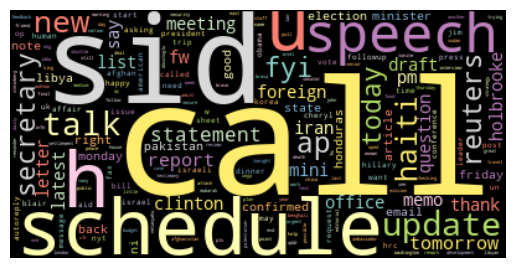

In [15]:
meta_subject = " ".join(i for i in df['MetadataSubject'])
meta_to = " ".join(i for i in df['MetadataTo'])
meta_from = " ".join(i for i in df['MetadataFrom'])
cc_text = " ".join(i for i in df['ExtractedCc'])

from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

wc = WordCloud(colormap="Set3",collocations=False).generate(meta_subject)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

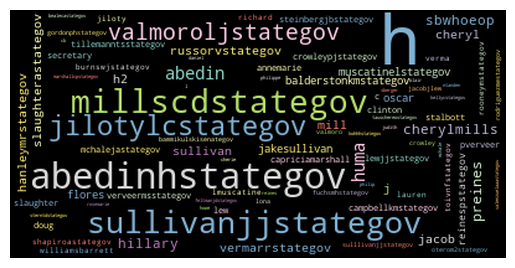

In [16]:
wc = WordCloud(colormap="Set3",collocations=False).generate(meta_to)
plt.imshow(wc,interpolation="blackman")
plt.axis("off")
plt.show()


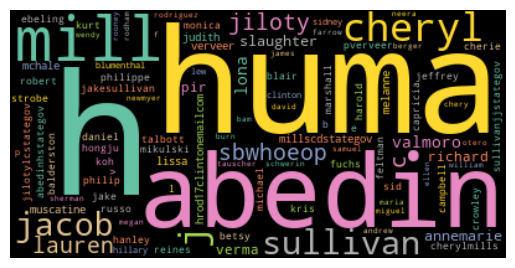

In [17]:
wc = WordCloud(colormap="Set2",collocations=False).generate(meta_from)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

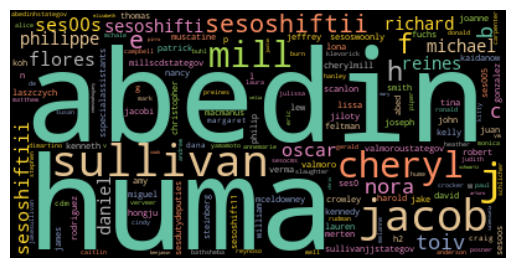

In [18]:
wc = WordCloud(colormap="Set2",collocations=False).generate(cc_text)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
print(meta_subject)

wow h latest syria aiding qaddafi sid chris stevens cairo condemnation final h latest syria aiding qaddafi sid meet rightwing extremist behind antimuslim film sparked deadly riot antimuslim film director hiding following libya egypt violence h latest syria aiding qaddafi sid secretary remark libya abz hbj libya west bankgaza libya hey piece libya nfz appear nyt oped page tomorrow dry eye nea thank youth libya one photo today youth libya libya libya h magariaf attack u libya sid h magariaf attack u libya sid proposed quad deal h magariaf privat reax sent memo sid libya amb stevens cnn belief blog prothero chris stevens mission quick summary potus call president libya egypt wash post hillary clinton try calm antius sentiment protester storm embassy yemen h lot new intel possible libyan collapse sid quick summary potus call president libya egypt condolence pm netanyahu american killed libya intel mission track weapon mini today friday september 14 2012 situation report 1 0914i situation r

In [20]:
subject_blob = TextBlob(meta_subject)
meta_blob = TextBlob(meta_to)
meta_from = TextBlob(meta_from)


from nltk.probability import FreqDist

most_common_words_in_subject = FreqDist(subject_blob.words)
top_50_most_common_words_in_subject = most_common_words_in_subject.most_common(50)
print("top 50 most common words in subject: ",top_50_most_common_words_in_subject)

top 50 most common words in subject:  [('call', 645), ('sid', 339), ('schedule', 259), ('h', 257), ('speech', 217), ('u', 216), ('update', 210), ('talk', 201), ('haiti', 161), ('ap', 159), ('fyi', 149), ('reuters', 147), ('secretary', 134), ('today', 132), ('new', 126), ('statement', 126), ('tomorrow', 117), ('report', 117), ('meeting', 108), ('mini', 101), ('foreign', 99), ('draft', 98), ('memo', 94), ('clinton', 91), ('fw', 85), ('list', 82), ('office', 78), ('iran', 78), ('holbrooke', 75), ('question', 71), ('latest', 70), ('letter', 69), ('pm', 68), ('say', 66), ('pakistan', 66), ('state', 65), ('note', 62), ('minister', 62), ('libya', 61), ('news', 61), ('right', 61), ('confirmed', 58), ('back', 57), ('good', 55), ('thank', 54), ('friday', 54), ('email', 54), ('monday', 54), ('election', 53), ('honduras', 53)]


In [21]:

most_common_words_in_sent_emails = FreqDist(meta_blob.words)
top_50_most_common_words_sent = most_common_words_in_sent_emails.most_common(50)
print(top_50_most_common_words_sent)


[('h', 5381), ('abedinhstategov', 352), ('millscdstategov', 312), ('sullivanjjstategov', 298), ('jilotylcstategov', 234), ('valmoroljstategov', 144), ('abedin', 80), ('huma', 80), ('preines', 60), ('sbwhoeop', 49), ('hillary', 49), ('cherylmills', 45), ('j', 39), ('cheryl', 38), ('mill', 37), ('hanleymrstategov', 34), ('h2', 33), ('jacob', 31), ('vermarrstategov', 30), ('slaughterastategov', 29), ('sullivan', 28), ('russorvstategov', 26), ('oscar', 19), ('flores', 18), ('muscatinelstategov', 18), ('jakesullivan', 17), ('balderstonkmstategov', 16), ('reinespstategov', 13), ('stalbott', 10), ('verveermsstategov', 10), ('pverveer', 10), ('crowleypjstategov', 10), ('secretary', 10), ('clinton', 10), ('mchalejastategov', 10), ('campbellkmstategov', 9), ('slaughter', 9), ('r', 8), ('steinbergjbstategov', 8), ('doug', 8), ('annemarie', 8), ('lewjjstategov', 7), ('capriciamarshall', 7), ('c', 7), ('lew', 7), ('tillemanntsstategov', 7), ('shapiroastategov', 6), ('rooneymstategov', 6), ('verma',

In [22]:
most_common_words_in_emails_received = FreqDist(meta_from.words)
top_50_most_common_words_in_emails_received = most_common_words_in_sent_emails.most_common(50)
print("top 50 words in emails received",top_50_most_common_words_in_emails_received)


top 50 words in emails received [('h', 5381), ('abedinhstategov', 352), ('millscdstategov', 312), ('sullivanjjstategov', 298), ('jilotylcstategov', 234), ('valmoroljstategov', 144), ('abedin', 80), ('huma', 80), ('preines', 60), ('sbwhoeop', 49), ('hillary', 49), ('cherylmills', 45), ('j', 39), ('cheryl', 38), ('mill', 37), ('hanleymrstategov', 34), ('h2', 33), ('jacob', 31), ('vermarrstategov', 30), ('slaughterastategov', 29), ('sullivan', 28), ('russorvstategov', 26), ('oscar', 19), ('flores', 18), ('muscatinelstategov', 18), ('jakesullivan', 17), ('balderstonkmstategov', 16), ('reinespstategov', 13), ('stalbott', 10), ('verveermsstategov', 10), ('pverveer', 10), ('crowleypjstategov', 10), ('secretary', 10), ('clinton', 10), ('mchalejastategov', 10), ('campbellkmstategov', 9), ('slaughter', 9), ('r', 8), ('steinbergjbstategov', 8), ('doug', 8), ('annemarie', 8), ('lewjjstategov', 7), ('capriciamarshall', 7), ('c', 7), ('lew', 7), ('tillemanntsstategov', 7), ('shapiroastategov', 6), (

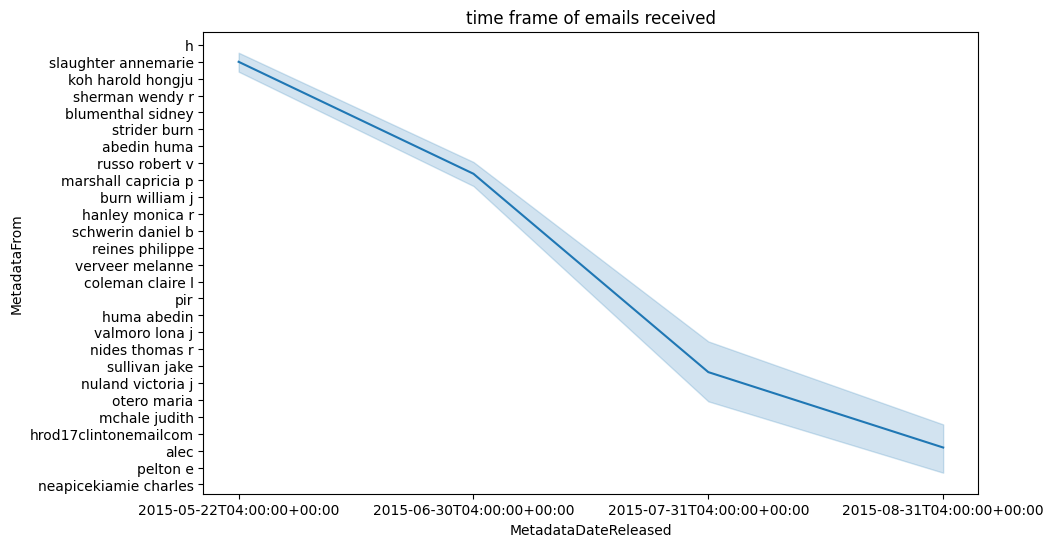

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['MetadataDateReleased'],y=df['MetadataFrom'])
plt.title("time frame of emails received")
plt.show()


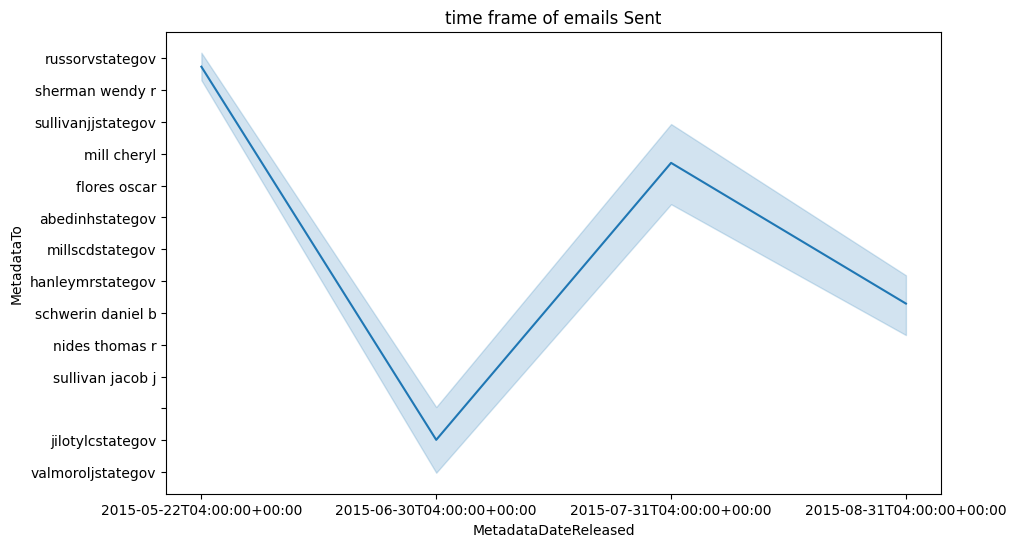

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['MetadataDateReleased'],y=df['MetadataTo'])
plt.title("time frame of emails Sent")
plt.show()


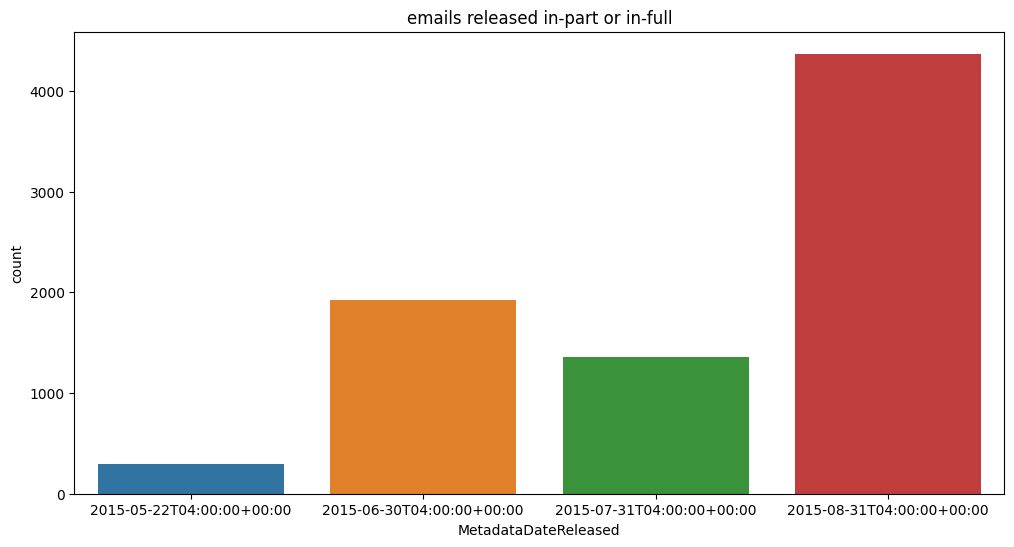

In [25]:
df['ExtractedReleaseInPartOrFull'] = [1 if X == "RELEASE IN PART" else 0 for X in df['ExtractedReleaseInPartOrFull']]
plt.figure(figsize=(12,6))
plt.title("emails released in-part or in-full")
sns.countplot(x='MetadataDateReleased',data=df)
plt.show()

In [26]:
from tensorflow.keras.utils import pad_sequences,to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional,Dropout


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


X = df['MetadataSubject']
y = df["ExtractedReleaseInPartOrFull"]

le.fit_transform(y)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from tensorflow.keras.utils import pad_sequences,to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 30000

tokenizer = Tokenizer(num_words)

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print(len(word_index))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




4309


In [27]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)
X_train = pad_sequences(X_train,max_length,padding="post")
X_test = pad_sequences(X_test,max_length,padding="post")

28


In [ ]:
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=100, input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(5,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(50, activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(2, activation='sigmoid'))

RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = RNN.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5408 - loss: 0.6875 - val_accuracy: 0.6604 - val_loss: 0.6211
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7212 - loss: 0.5653 - val_accuracy: 0.7123 - val_loss: 0.5466
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7932 - loss: 0.4333 - val_accuracy: 0.7170 - val_loss: 0.5467
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8189 - loss: 0.3738 - val_accuracy: 0.7280 - val_loss: 0.5770
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8354 - loss: 0.3385 - val_accuracy: 0.7138 - val_loss: 0.6040
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8452 - loss: 0.3135 - val_accuracy: 0.7390 - val_loss: 0.6306
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8513 - loss: 0.2930 - val_accuracy: 0.7469 - val_loss: 0.6500
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8529 - loss: 0.2889 - val_accuracy: 0.